# Credits to Zero to Mastery Online courses and the instructor Daniel Bourke
https://academy.zerotomastery.io/courses/
# Course Notes
https://github.com/mrdbourke/tensorflow-deep-learning

As we done our MvP 1 with Binary classification, now we focus on multi-class classification with 10 food classes

In [ ]:
#Import the dependenics
import zipfile
import os
import pathlib
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
from IPython.display import Image
import pandas as pd
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import seaborn as sns
from mlxtend.preprocessing import minmax_scaling
from sklearn.metrics import roc_curve, auc
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Input, BatchNormalization, Multiply, Activation
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from keras import backend as K

In [ ]:
#Check the version
print(tf.__version__)

2.8.0


In [ ]:
## Get the function ipynb file for reusing of codes (helper function)
!wget https://github.com/DSstore/AIP/raw/main/functions.ipynb

--2022-02-23 15:06:03--  https://github.com/DSstore/AIP/raw/main/functions.ipynb
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DSstore/AIP/main/functions.ipynb [following]
--2022-02-23 15:06:03--  https://raw.githubusercontent.com/DSstore/AIP/main/functions.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10225 (10.0K) [text/plain]
Saving to: ‘functions.ipynb’

functions.ipynb     100%[===================>]   9.99K  --.-KB/s    in 0s      

2022-02-23 15:06:04 (91.0 MB/s) - ‘functions.ipynb’ saved [10225/10225]



In [ ]:
#Install import_ipynb function in order to use ipynb as seperate function calls 
!pip install import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=5ef928a565e5c216c92bc2200e8606041b9cb2108f45fb358923889afd3a38e7
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


In [ ]:
import import_ipynb
import functions as fn

importing Jupyter notebook from functions.ipynb
16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
# Download zip file of SG_Food
!wget https://storage.googleapis.com/sgfood/SG_Food.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("SG_Food.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-02-23 15:06:16--  https://storage.googleapis.com/sgfood/SG_Food.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 237822812 (227M) [application/x-zip-compressed]
Saving to: ‘SG_Food.zip’

SG_Food.zip         100%[===================>] 226.80M  35.7MB/s    in 6.4s    

2022-02-23 15:06:24 (35.7 MB/s) - ‘SG_Food.zip’ saved [237822812/237822812]



## *Inspect the data*

Visualizing the data is the key starting part to understand the data

In [ ]:
!ls SG_Food

test  train


There's 2 directories (test and train)

In [ ]:
!ls SG_Food/train

'bak kut teh'	  'curry puff'		    'nasi lemak'        satay
'char kway teow'  'Hainanese Chicken Rice'  'oyster omelette'
 chendol	   laksa		    'roti prata'


Inside the directories of test and train, there are another 10 sub-directories/folders

In [ ]:
!ls SG_Food/test/'char kway teow'

'char kway teow_test0.jpg'    'char kway teow_test212.jpg'
'char kway teow_test100.jpg'  'char kway teow_test213.jpg'
'char kway teow_test101.jpg'  'char kway teow_test214.jpg'
'char kway teow_test102.jpg'  'char kway teow_test215.jpg'
'char kway teow_test103.jpg'  'char kway teow_test216.jpg'
'char kway teow_test104.jpg'  'char kway teow_test217.jpg'
'char kway teow_test105.jpg'  'char kway teow_test218.jpg'
'char kway teow_test106.jpg'  'char kway teow_test219.jpg'
'char kway teow_test107.jpg'  'char kway teow_test21.jpg'
'char kway teow_test108.jpg'  'char kway teow_test220.jpg'
'char kway teow_test109.jpg'  'char kway teow_test221.jpg'
'char kway teow_test10.jpg'   'char kway teow_test222.jpg'
'char kway teow_test110.jpg'  'char kway teow_test223.jpg'
'char kway teow_test111.jpg'  'char kway teow_test224.jpg'
'char kway teow_test112.jpg'  'char kway teow_test225.jpg'
'char kway teow_test113.jpg'  'char kway teow_test226.jpg'
'char kway teow_test114.jpg'  'char kway teow_test227.jpg

These are the files are contained in sub-folder of train/char kway teow

In [ ]:
# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("SG_Food"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'SG_Food'.
There are 10 directories and 0 images in 'SG_Food/train'.
There are 0 directories and 750 images in 'SG_Food/train/roti prata'.
There are 0 directories and 750 images in 'SG_Food/train/nasi lemak'.
There are 0 directories and 750 images in 'SG_Food/train/bak kut teh'.
There are 0 directories and 750 images in 'SG_Food/train/satay'.
There are 0 directories and 750 images in 'SG_Food/train/curry puff'.
There are 0 directories and 750 images in 'SG_Food/train/laksa'.
There are 0 directories and 750 images in 'SG_Food/train/chendol'.
There are 0 directories and 750 images in 'SG_Food/train/Hainanese Chicken Rice'.
There are 0 directories and 750 images in 'SG_Food/train/char kway teow'.
There are 0 directories and 750 images in 'SG_Food/train/oyster omelette'.
There are 10 directories and 0 images in 'SG_Food/test'.
There are 0 directories and 250 images in 'SG_Food/test/roti prata'.
There are 0 directories and 250 images in 'SG_Food/test/

There's a total of 7500 train images (750 each) and a total of 2500 test images (250 each) for this dataset 

In [ ]:
# setup the training and test directory paths
train_dir = "SG_Food/train/"
test_dir = "SG_Food/test/"

In [ ]:
# Get the class names for our multi-class dataset

data_dir = pathlib.Path(train_dir)
train_filepaths = list(data_dir.glob(r'**/*.jpg'))
test_data_dir = pathlib.Path(test_dir)
test_filepaths = list(test_data_dir.glob(r'**/*.jpg'))
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [ ]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [ ]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)

In [ ]:
#Assign the data into data frame
train_df

Filepath                   Label
0      SG_Food/train/nasi lemak/nasi lemak_train279.jpg              nasi lemak
1      SG_Food/train/roti prata/roti prata_train645.jpg              roti prata
2     SG_Food/train/char kway teow/char kway teow_tr...          char kway teow
3                SG_Food/train/laksa/laska_train360.jpg                   laksa
4                SG_Food/train/laksa/laska_train424.jpg                   laksa
...                                                 ...                     ...
7495  SG_Food/train/Hainanese Chicken Rice/Hainanese...  Hainanese Chicken Rice
7496             SG_Food/train/satay/satay_train583.jpg                   satay
7497             SG_Food/train/laksa/laska_train647.jpg                   laksa
7498  SG_Food/train/char kway teow/char kway teow_tr...          char kway teow
7499  SG_Food/train/oyster omelette/oyster omelette_...         oyster omelette

[7500 rows x 2 columns]

In [ ]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 7500

Number of different labels: 10

Labels: ['nasi lemak' 'roti prata' 'char kway teow' 'laksa' 'oyster omelette'
 'satay' 'Hainanese Chicken Rice' 'bak kut teh' 'curry puff' 'chendol']


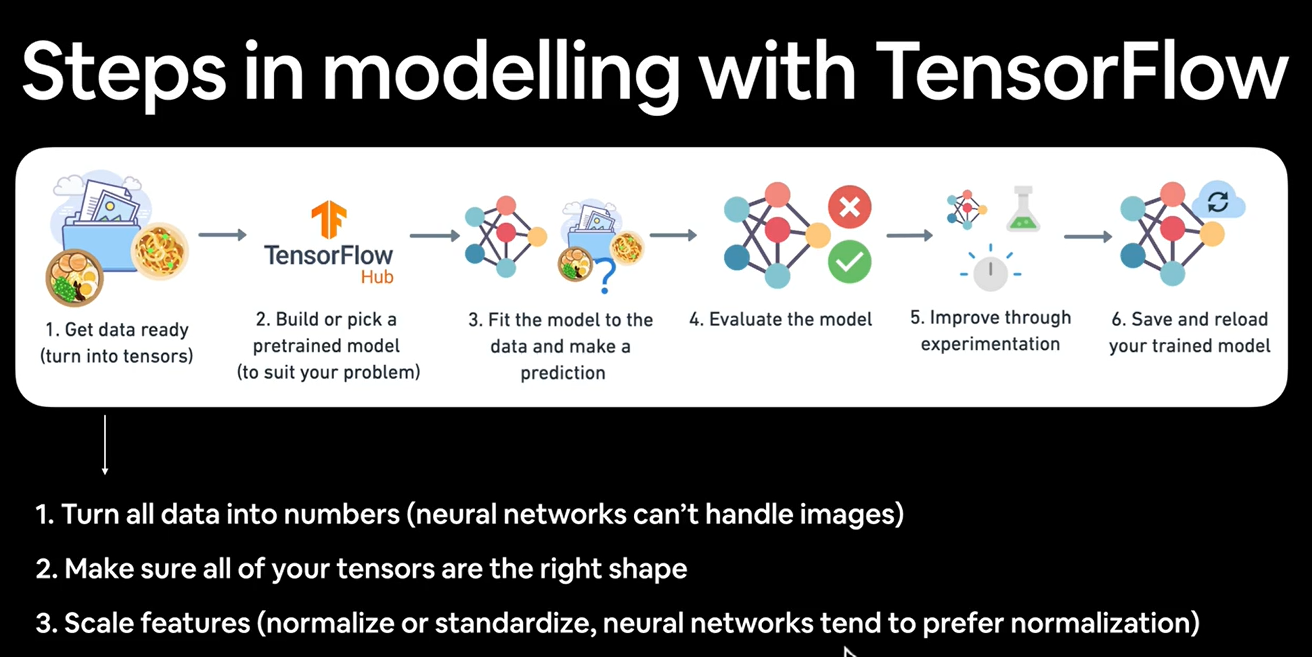

In [ ]:
##Source: Online lecture notes from https://academy.zerotomastery.io/courses/1240775/lectures/
Image("https://github.com/DSstore/AIP/raw/main/TensorFlow_WorkFlow1.png")

**1. Visualize and understand the data**

In [ ]:
#View a random class by using the random function
random.choice(class_names)

'roti prata'

['oyster omelette_train101.jpg']
Image shape: (168, 299, 3)


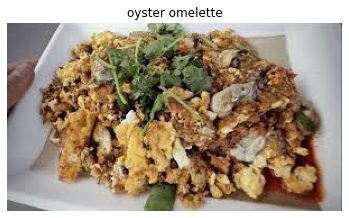

In [ ]:
# Calling view_random_image from function.ipynb
# Now view a random image from the training dataset

img = fn.view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

In [ ]:
img #displaying in a big array with pixel representing RGB

array([[[ 89,  88,  94],
        [ 89,  88,  94],
        [ 90,  89,  95],
        ...,
        [130, 131, 136],
        [ 99, 100, 105],
        [ 33,  34,  39]],

       [[ 89,  88,  94],
        [ 89,  88,  94],
        [ 90,  89,  95],
        ...,
        [140, 141, 146],
        [112, 113, 118],
        [ 49,  50,  55]],

       [[ 90,  89,  95],
        [ 90,  89,  95],
        [ 91,  90,  96],
        ...,
        [152, 153, 158],
        [130, 131, 136],
        [ 71,  72,  77]],

       ...,

       [[105, 106, 111],
        [105, 106, 111],
        [105, 106, 111],
        ...,
        [146, 147, 152],
        [147, 148, 153],
        [109, 110, 115]],

       [[105, 106, 111],
        [105, 106, 111],
        [105, 106, 111],
        ...,
        [145, 146, 151],
        [147, 148, 153],
        [109, 110, 115]],

       [[105, 106, 111],
        [105, 106, 111],
        [105, 106, 111],
        ...,
        [145, 146, 151],
        [146, 147, 152],
        [108, 109, 114]]

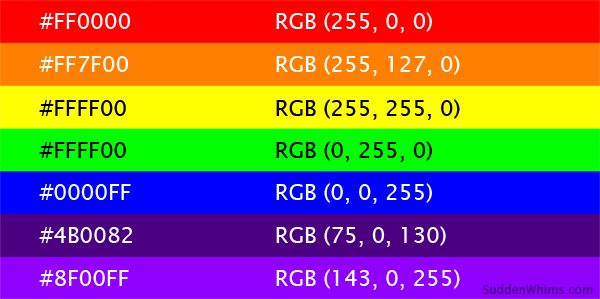

In [ ]:
#An example of how colour code look like
#Source: https://www.rapidtables.com/web/color/RGB_Color.html
Image("https://github.com/DSstore/AIP/raw/main/RGB.jpg")

In [ ]:
#checking how it will look in tensor
tf.constant(img)

<tf.Tensor: shape=(168, 299, 3), dtype=uint8, numpy=
array([[[ 89,  88,  94],
        [ 89,  88,  94],
        [ 90,  89,  95],
        ...,
        [130, 131, 136],
        [ 99, 100, 105],
        [ 33,  34,  39]],

       [[ 89,  88,  94],
        [ 89,  88,  94],
        [ 90,  89,  95],
        ...,
        [140, 141, 146],
        [112, 113, 118],
        [ 49,  50,  55]],

       [[ 90,  89,  95],
        [ 90,  89,  95],
        [ 91,  90,  96],
        ...,
        [152, 153, 158],
        [130, 131, 136],
        [ 71,  72,  77]],

       ...,

       [[105, 106, 111],
        [105, 106, 111],
        [105, 106, 111],
        ...,
        [146, 147, 152],
        [147, 148, 153],
        [109, 110, 115]],

       [[105, 106, 111],
        [105, 106, 111],
        [105, 106, 111],
        ...,
        [145, 146, 151],
        [147, 148, 153],
        [109, 110, 115]],

       [[105, 106, 111],
        [105, 106, 111],
        [105, 106, 111],
        ...,
        [145, 146, 15

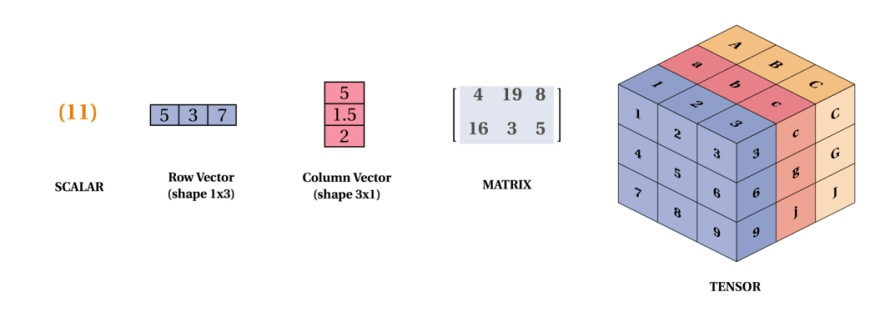

In [ ]:
#Source: https://dev.to/mmithrakumar/scalars-vectors-matrices-and-tensors-with-tensorflow-2-0-1f66
Image("https://github.com/DSstore/AIP/raw/main/tensorflow%20matrix.png")

In [ ]:
## View the image shape
img.shape # returns (height, width, colour channels)

(168, 299, 3)

In our case, the width and height vary but because we're dealing with colour images, the colour channels value is always 3

The values in the img array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value red=0, green=0, blue=255 will look very blue.

In [ ]:
# Rescale all the pixel values between 0 & 1 for normalization
img/255.

array([[[0.34901961, 0.34509804, 0.36862745],
        [0.34901961, 0.34509804, 0.36862745],
        [0.35294118, 0.34901961, 0.37254902],
        ...,
        [0.50980392, 0.51372549, 0.53333333],
        [0.38823529, 0.39215686, 0.41176471],
        [0.12941176, 0.13333333, 0.15294118]],

       [[0.34901961, 0.34509804, 0.36862745],
        [0.34901961, 0.34509804, 0.36862745],
        [0.35294118, 0.34901961, 0.37254902],
        ...,
        [0.54901961, 0.55294118, 0.57254902],
        [0.43921569, 0.44313725, 0.4627451 ],
        [0.19215686, 0.19607843, 0.21568627]],

       [[0.35294118, 0.34901961, 0.37254902],
        [0.35294118, 0.34901961, 0.37254902],
        [0.35686275, 0.35294118, 0.37647059],
        ...,
        [0.59607843, 0.6       , 0.61960784],
        [0.50980392, 0.51372549, 0.53333333],
        [0.27843137, 0.28235294, 0.30196078]],

       ...,

       [[0.41176471, 0.41568627, 0.43529412],
        [0.41176471, 0.41568627, 0.43529412],
        [0.41176471, 0

In [ ]:
# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224), #224x224 is a very common size for preprocessing images
                                               batch_size=32, #Batch size 32 is common as well
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


**flow_from_directory** - it takes the path to a directory and generates batches of augmented/normalized data.

_______________________________________________________________________

**batch_size** - number of of images to process at a time and batch size 32 is very common in machine learning due to our limitation of current technology

__________________________________________________________________________

**target_size** - Convert all images to height 244, width 244. Why 244?
It is a common image size for machine learning.

__________________________________________________________________________

**class_mode** - The type of problem we're working on


**Why is the image size 224x224?**

This could actually be any size we wanted, however, 224x224 is a very common size for preprocessing images to. Depending on whether if we want a larger or smaller image

Since we are dealing with multiclass classification, we have to use 'categorical' for our class mode

# EDA - **Exploratory Data Analysis**

In [ ]:
class_names

array(['Hainanese Chicken Rice', 'bak kut teh', 'char kway teow',
       'chendol', 'curry puff', 'laksa', 'nasi lemak', 'oyster omelette',
       'roti prata', 'satay'], dtype='<U22')

In [ ]:
# Using the glob function to come up with a map of images of the respective food classes
f_Hainanese_Chicken_Rice = glob.glob('SG_Food/train/'+class_names[0]+'/*')
f_Hainanese_Chicken_Rice_test = glob.glob('SG_Food/train/'+class_names[0]+'/*')
f_bak_kut_teh = glob.glob('SG_Food/train/'+class_names[1]+'/*')
f_bak_kut_teh_test = glob.glob('SG_Food/train/'+class_names[1]+'/*')
f_char_kway_teow = glob.glob('SG_Food/train/'+class_names[2]+'/*')
f_char_kway_teow_test = glob.glob('SG_Food/train/'+class_names[2]+'/*')
f_chendol = glob.glob('SG_Food/train/'+class_names[3]+'/*')
f_chendol_test = glob.glob('SG_Food/train/'+class_names[3]+'/*')
f_curry_puff = glob.glob('SG_Food/train/'+class_names[4]+'/*')
f_curry_puff_test = glob.glob('SG_Food/train/'+class_names[4]+'/*')
f_laksa = glob.glob('SG_Food/train/'+class_names[5]+'/*')
f_laksa_test = glob.glob('SG_Food/train/'+class_names[5]+'/*')
f_nasi_lemak = glob.glob('SG_Food/train/'+class_names[6]+'/*')
f_nasi_lemak_test = glob.glob('SG_Food/train/'+class_names[6]+'/*')
f_oyster_omelette = glob.glob('SG_Food/train/'+class_names[7]+'/*')
f_oyster_omelette_test = glob.glob('SG_Food/train/'+class_names[7]+'/*')
f_roti_prata = glob.glob('SG_Food/train/'+class_names[8]+'/*')
f_roti_prata_test = glob.glob('SG_Food/train/'+class_names[8]+'/*')
f_satay = glob.glob('SG_Food/train/'+class_names[9]+'/*')
f_satay_test = glob.glob('SG_Food/train/'+class_names[9]+'/*')

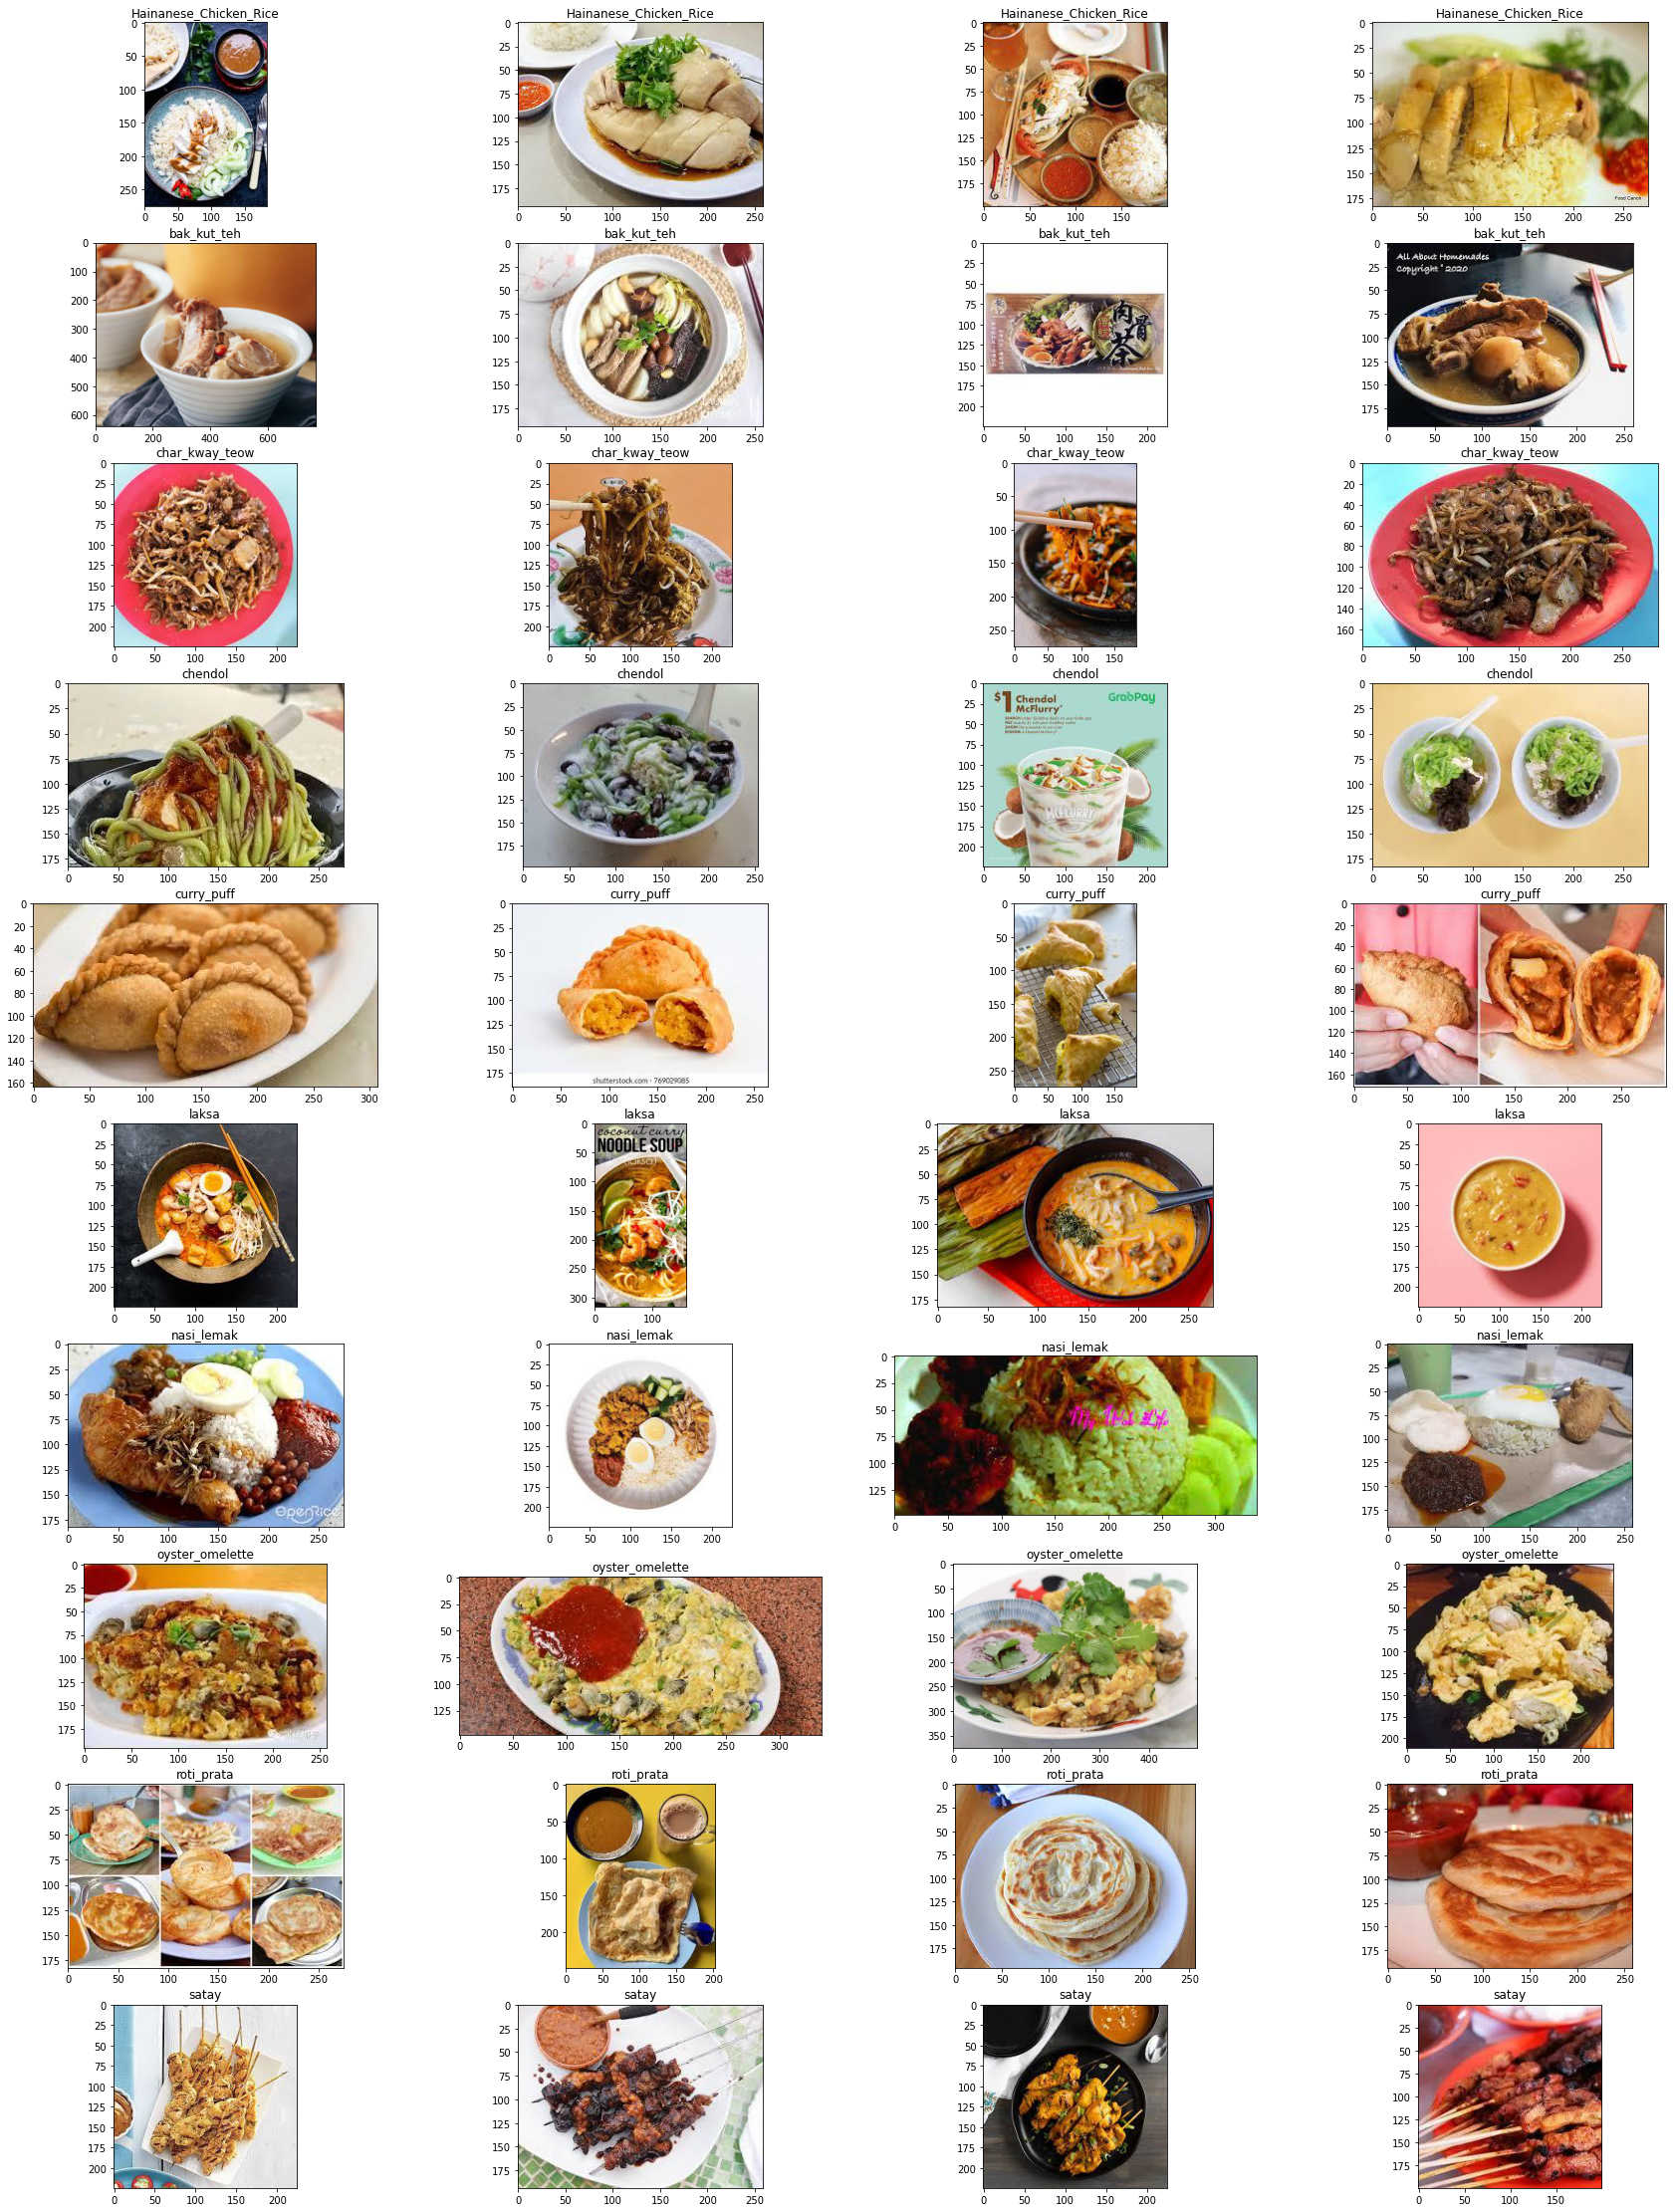

In [ ]:
n = 4
fig, axes = plt.subplots(10,n,figsize=(30,40))

for i in range(n):
    axes[0, i].imshow(plt.imread(f_Hainanese_Chicken_Rice[i]))
    axes[0, i].set_title('Hainanese_Chicken_Rice')
    axes[1, i].imshow(plt.imread(f_bak_kut_teh[i]))
    axes[1, i].set_title('bak_kut_teh')
    axes[2, i].imshow(plt.imread(f_char_kway_teow[i]))
    axes[2, i].set_title('char_kway_teow')
    axes[3, i].imshow(plt.imread(f_chendol[i]))
    axes[3, i].set_title('chendol')
    axes[4, i].imshow(plt.imread(f_curry_puff[i]))
    axes[4, i].set_title('curry_puff')
    axes[5, i].imshow(plt.imread(f_laksa[i]))
    axes[5, i].set_title('laksa')
    axes[6, i].imshow(plt.imread(f_nasi_lemak[i]))
    axes[6, i].set_title('nasi_lemak')
    axes[7, i].imshow(plt.imread(f_oyster_omelette[i]))
    axes[7, i].set_title('oyster_omelette')
    axes[8, i].imshow(plt.imread(f_roti_prata[i]))
    axes[8, i].set_title('roti_prata')
    axes[9, i].imshow(plt.imread(f_satay[i]))
    axes[9, i].set_title('satay')


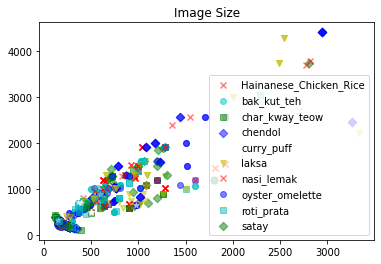

In [ ]:
#Using matplotlib and glob function to map out the general image size of the current images
for i in range(len(f_Hainanese_Chicken_Rice)):
    h1,w1,c1 = plt.imread(f_Hainanese_Chicken_Rice[i]).shape
    h2,w2,c2 = plt.imread(f_bak_kut_teh[i]).shape
    h3,w3,c3 = plt.imread(f_char_kway_teow[i]).shape
    h4,w4,c4 = plt.imread(f_chendol[i]).shape
    h5,w5,c5 = plt.imread(f_curry_puff[i]).shape
    h6,w6,c6 = plt.imread(f_laksa[i]).shape
    h7,w7,c7 = plt.imread(f_nasi_lemak[i]).shape
    h8,w8,c8 = plt.imread(f_oyster_omelette[i]).shape
    h9,w9,c9 = plt.imread(f_roti_prata[i]).shape
    h10,w10,c10 = plt.imread(f_satay[i]).shape
    plt.scatter(h1,w1,c='r',marker='x',alpha=0.5)
    plt.scatter(h2,w2,c='c',marker='o',alpha=0.5)
    plt.scatter(h3,w3,c='g',marker='s',alpha=0.5)
    plt.scatter(h4,w4,c='b',marker='D',alpha=0.5)
    plt.scatter(h5,w5,c='w',marker='*',alpha=0.5)
    plt.scatter(h6,w6,c='y',marker='v',alpha=0.5)
    plt.scatter(h7,w7,c='r',marker='x',alpha=0.5)
    plt.scatter(h8,w8,c='b',marker='o',alpha=0.5)
    plt.scatter(h9,w9,c='c',marker='s',alpha=0.5)
    plt.scatter(h10,w10,c='g',marker='D',alpha=0.5)


plt.title('Image Size')
plt.legend(('Hainanese_Chicken_Rice','bak_kut_teh', 'char_kway_teow', 'chendol', 'curry_puff', 'laksa', 'nasi_lemak', 'oyster_omelette', 'roti_prata', 'satay'))

This shows that our images are too small and it might pose a problem for the model to process features out of the the small images.

# ***Model 1 (BaseLine Model)***

Steps in building a model

1. Load our images
2. Preprocess our images
3. Build a CNN to find patterns in our images
4. Compile our CNN
5. Fit the CNN to our training data



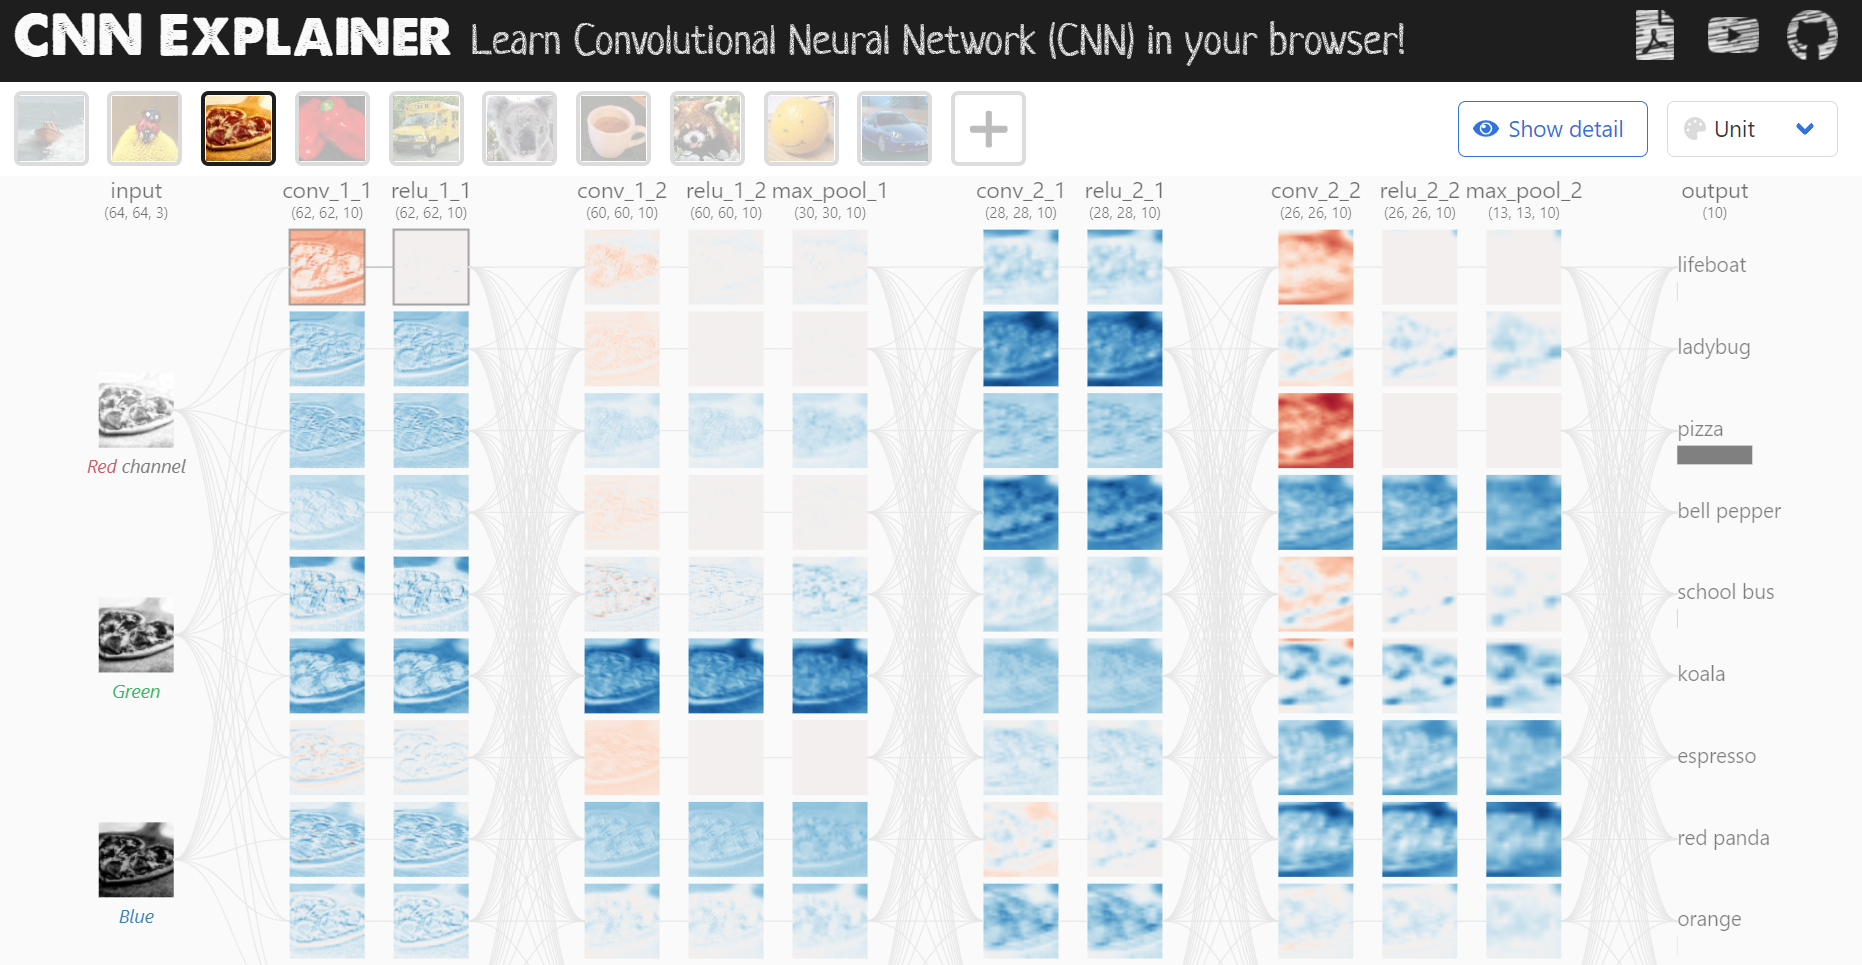

In [ ]:
#Source: https://poloclub.github.io/cnn-explainer/
Image("https://github.com/DSstore/AIP/raw/main/CNNexplainer.png")

Let's set our model based off CNN explainer as our baseline

So lets follow what the website set as.
1. Conv2D with relu activation, input ()
------------------------------
2. Conv2D with relu activation
3. MaxPool2D
--------------------------------
4. Conv2D with relu activation
--------------------------------
5. Conv2D with relu activation
6. MaxPool2D
-------------------------------
7. Output Fully Connected

In [ ]:
model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_1.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

Take note of the 2 **changes** we made.

____________________________
**softmax** - Computes softmax activations. 

Used for multi-class predictions. The sum of all outputs generated by softmax is 1.

🔑**tf.nn.softmax(
    logits, axis=None, name=None
)**

____________________________

**categorical_crossentropy** - Computes the categorical crossentropy loss.

🔑**tf.keras.metrics.categorical_crossentropy(
    y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1
)**
___________________________

**Sequential model** - It is a tensor flow deep learning library to create a deep learning model for both regression and classification problems. It allows us to create a deep learning model by adding layers to it.

________________________________________________________________________________

**Conv2D** - Layers are also represented within the Keras deep learning framework. For two-dimensional inputs, such as images, they are represented by keras.layers.Conv2D

🔑**tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid',
    data_format=None, dilation_rate=(1, 1), groups=1, activation=None,
    use_bias=True, kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)**

_______________________________________________________________________________
**Filters** - represents the number of filters that should be learnt by the convolutional layer aka the dimensionality of the output.

________________________________________________________________________________
**Kernel size** - represents the number of pixels in height and width that should be summarized, i.e. the two-dimensional width and height of the filter.

________________________________________________________________________________
**ReLU** - it is an activation function is specifically used as a non-linear activation function.CNNs are able to achieve such tremendous accuracies is because of their non-linearity. ReLU applies much-needed non-linearity into the model. Non-linearity is necessary to produce non-linear decision boundaries, so that the output cannot be written as a linear combination of the inputs. 

________________________________________________________________________________
**MaxPool2D** - Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.

🔑**tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), strides=None, padding='valid', data_format=None,
    **kwargs
)**

________________________________________________________________________________
**Flatten** - This layer converts a three-dimensional layer in the network into a one-dimensional vector to fit the input of a fully-connected layer for classification
For example, a 5x5x2 tensor would be converted into a vector of size 50

🔑**tf.keras.layers.Flatten(
    data_format=None, **kwargs
)**

________________________________________________________________________________
**Dense** - Just your regular fully-connected neural network layer.

🔑**tf.keras.layers.Dense(
    units, activation=None, use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)**



**3. Fit a model**

In [ ]:
len(test_data) #79*32=2528

79

In [ ]:
# Fit the model
history_1 = model_1.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 44s 144ms/step - loss: 1.9457 - accuracy: 0.2981 - val_loss: 1.6967 - val_accuracy: 0.4032
Epoch 2/5
235/235 [==============================] - 33s 140ms/step - loss: 1.2313 - accuracy: 0.5928 - val_loss: 1.4616 - val_accuracy: 0.5176
Epoch 3/5
235/235 [==============================] - 33s 139ms/step - loss: 0.6352 - accuracy: 0.8025 - val_loss: 1.4772 - val_accuracy: 0.5728
Epoch 4/5
235/235 [==============================] - 33s 140ms/step - loss: 0.2448 - accuracy: 0.9264 - val_loss: 1.7247 - val_accuracy: 0.5764
Epoch 5/5
235/235 [==============================] - 33s 141ms/step - loss: 0.0867 - accuracy: 0.9793 - val_loss: 2.0259 - val_accuracy: 0.5736


**4. Evaulate the model**



In [ ]:
# Evaluate on the test data
model_1.evaluate(test_data)

79/79 [==============================] - 8s 97ms/step - loss: 2.0259 - accuracy: 0.5736


[2.025860548019409, 0.5735999941825867]

Our accuracy isn't doing too well, we have to improve it

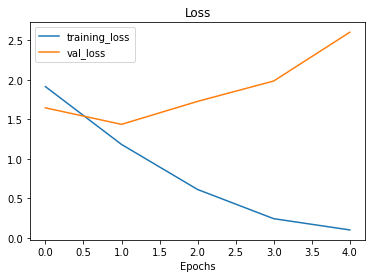

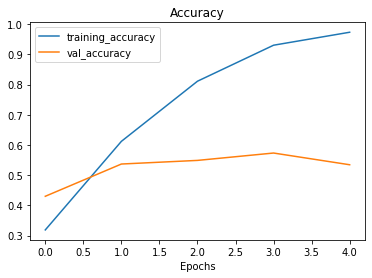

In [ ]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
fn.plot_loss_curves(history_1)

** Observation **

From this graph, we can see our model is Overfitting. 
By right, as our training_loss is going down, our val_loss is expected to go down too. However, it went up after epoch 1.
Same applied to training accuracy, we expect our val_accuracy to follow closely. But it went down rougly around epoch 1 too.

What it means? 
It means the model is getting great results on training data but fails to generalise well to unseen data and performs poorly on the test dataset.

**6. Adjust the model hyperparameter (to beat the baseline/reduce overfitting)**

Ways to reduce overfitting

* Get more data - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.

* Simplify model - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.

* Use data augmentation - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.

* Use transfer learning - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

To do so, we'll remove two of the convolutional layers, taking the total number of convolutional layers from four to two.

# **Model 2 (Simplify the model to test if it work out)**

In [ ]:
# Try a simplified model (removed two layers)
model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 38s 125ms/step - loss: 1.9473 - accuracy: 0.3136 - val_loss: 1.6483 - val_accuracy: 0.4404
Epoch 2/5
235/235 [==============================] - 29s 123ms/step - loss: 1.1461 - accuracy: 0.6372 - val_loss: 1.5592 - val_accuracy: 0.4964
Epoch 3/5
235/235 [==============================] - 28s 121ms/step - loss: 0.6217 - accuracy: 0.8207 - val_loss: 1.6370 - val_accuracy: 0.5428
Epoch 4/5
235/235 [==============================] - 28s 120ms/step - loss: 0.2948 - accuracy: 0.9243 - val_loss: 1.6760 - val_accuracy: 0.5676
Epoch 5/5
235/235 [==============================] - 28s 120ms/step - loss: 0.1356 - accuracy: 0.9695 - val_loss: 1.9704 - val_accuracy: 0.5568


We got more or less the same results as model_1

In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 7s 94ms/step - loss: 2.0259 - accuracy: 0.5736


[2.025860548019409, 0.5735999941825867]

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 29160)             0         
                                                                 
 dense (Dense)               (None, 10)                2

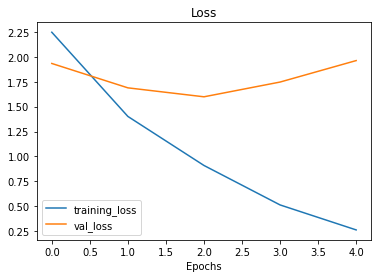

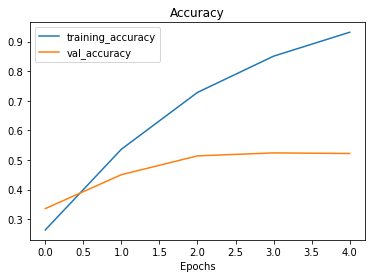

In [ ]:
fn.plot_loss_curves(history_2)

**Observation**
1. However, our val_loss and val_accuracy still do rather poorly. The overfitting situation still remains.
2. training_loss and training_accuracy seems to be able to get better if we run on more epochs

# **Model 3 (Data augmentation)**

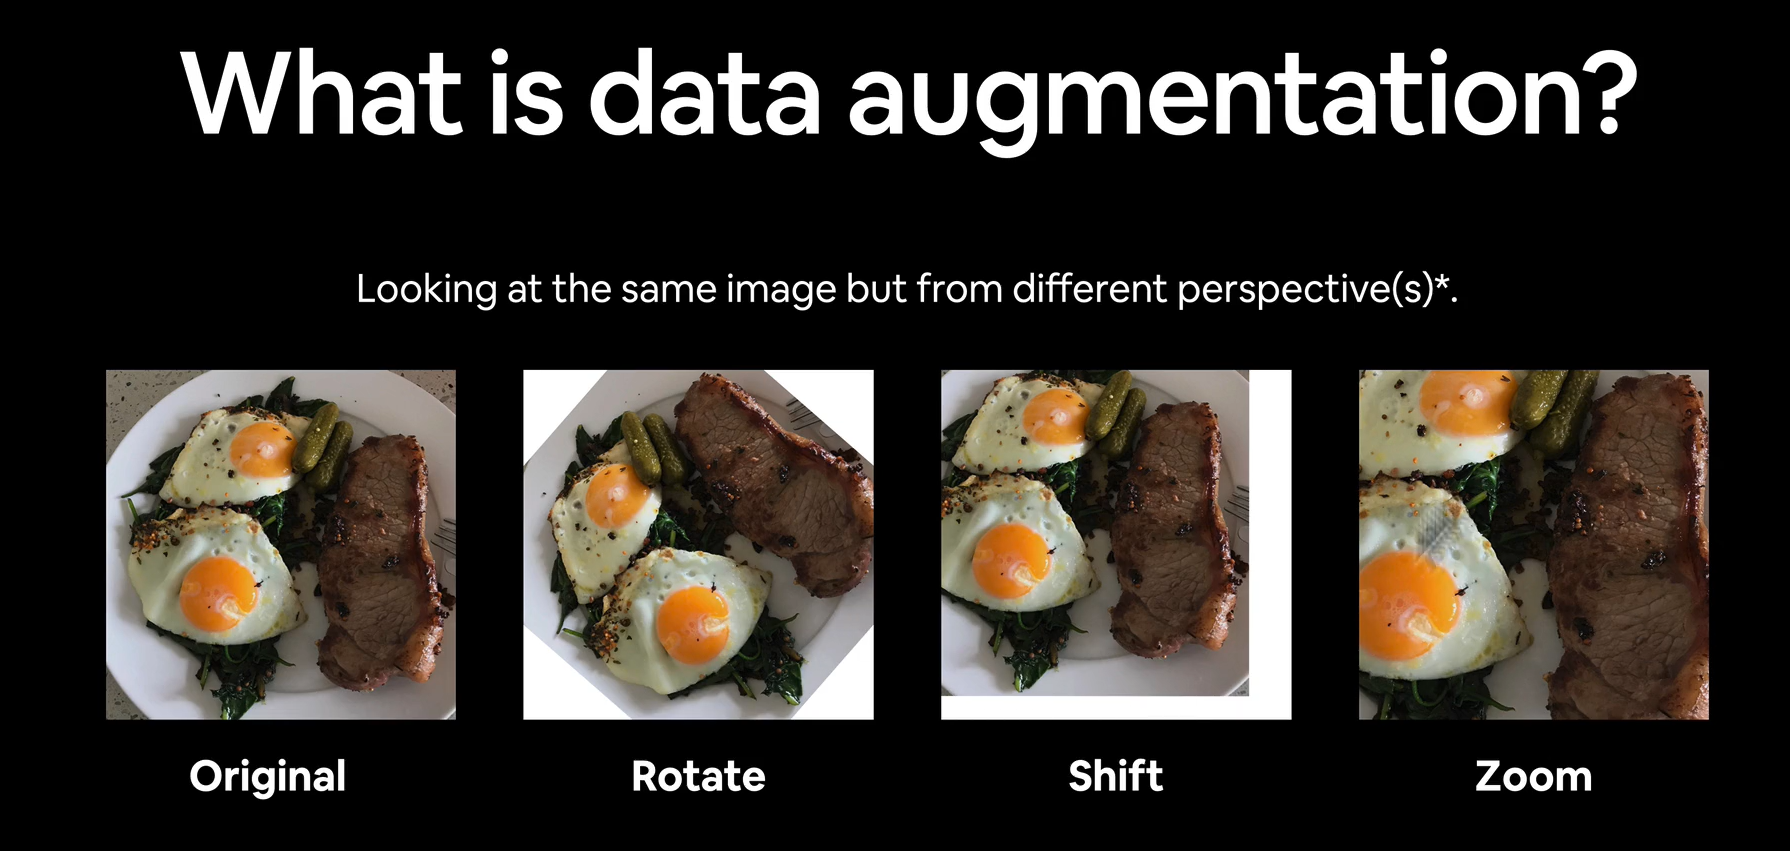

In [ ]:
#Source: Online lecture notes from https://academy.zerotomastery.io/courses/1240775/lectures/
Image("https://github.com/DSstore/AIP/raw/main/data_augmentation.png")

To create augmented data, we'll recreate a new ImageDataGenerator instance, this time adding some parameters such as ***rotation_range*** and ***horizontal_flip*** to manipulate our images.

In [ ]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=45, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
# Clone the model (use the same architecture)
model_3 = tf.keras.models.clone_model(model_2)

# Compile the cloned model (same setup as used for model_10)
model_3.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 108s 457ms/step - loss: 2.0690 - accuracy: 0.2519 - val_loss: 1.8383 - val_accuracy: 0.3348
Epoch 2/5
235/235 [==============================] - 107s 455ms/step - loss: 1.8106 - accuracy: 0.3532 - val_loss: 1.6659 - val_accuracy: 0.4144
Epoch 3/5
235/235 [==============================] - 105s 447ms/step - loss: 1.7027 - accuracy: 0.3993 - val_loss: 1.5714 - val_accuracy: 0.4412
Epoch 4/5
235/235 [==============================] - 105s 448ms/step - loss: 1.6296 - accuracy: 0.4280 - val_loss: 1.6453 - val_accuracy: 0.4472
Epoch 5/5
235/235 [==============================] - 105s 446ms/step - loss: 1.5927 - accuracy: 0.4419 - val_loss: 1.4698 - val_accuracy: 0.4920


In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 8s 96ms/step - loss: 2.0259 - accuracy: 0.5736


[2.02586030960083, 0.5735999941825867]

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 8s 96ms/step - loss: 1.5935 - accuracy: 0.5804


[1.5934621095657349, 0.5803999900817871]

In [ ]:
model_3.evaluate(test_data)

79/79 [==============================] - 12s 151ms/step - loss: 1.4698 - accuracy: 0.4920


[1.4698030948638916, 0.492000013589859]

In [ ]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

accuracy for model_3 seems to be lowest but a huge improvement for the loss

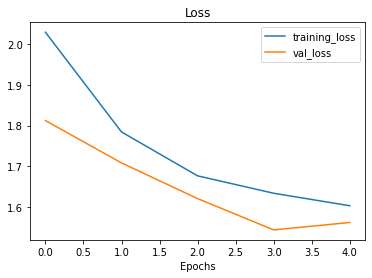

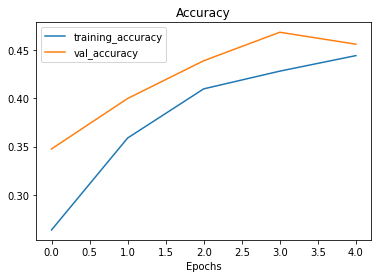

In [ ]:
# Check the model's performance with augumented data
fn.plot_loss_curves(history_3)

**Observation**

1. model_3's val_loss and val_accuracy does not performed better statistically (compared to model_1 or model_2) but they are heading on the right direction
2. And it seems like the longer we do our epochs, our training loss will become better


# **Model 4** (increase the filters to 32, added 1 more Conv2D layer, increase number of Maxpooling, epochs to 10)

In [ ]:
# Create the model
model_4 = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(), # reduce number of features by half
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model_4.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(train_data_augmented, # changed to augmented training data
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 109s 461ms/step - loss: 2.0453 - accuracy: 0.2491 - val_loss: 1.7674 - val_accuracy: 0.3616
Epoch 2/10
235/235 [==============================] - 108s 459ms/step - loss: 1.6927 - accuracy: 0.4008 - val_loss: 1.7742 - val_accuracy: 0.4052
Epoch 3/10
235/235 [==============================] - 108s 459ms/step - loss: 1.5253 - accuracy: 0.4733 - val_loss: 1.4079 - val_accuracy: 0.5236
Epoch 4/10
235/235 [==============================] - 108s 459ms/step - loss: 1.4453 - accuracy: 0.5063 - val_loss: 1.4341 - val_accuracy: 0.5020
Epoch 5/10
235/235 [==============================] - 108s 459ms/step - loss: 1.3561 - accuracy: 0.5287 - val_loss: 1.3518 - val_accuracy: 0.5472
Epoch 6/10
235/235 [==============================] - 107s 457ms/step - loss: 1.2950 - accuracy: 0.5552 - val_loss: 1.3630 - val_accuracy: 0.5600
Epoch 7/10
235/235 [==============================] - 106s 452ms/step - loss: 1.2208 - accuracy: 0.5912 - val_loss: 1.3793 -

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 32)      

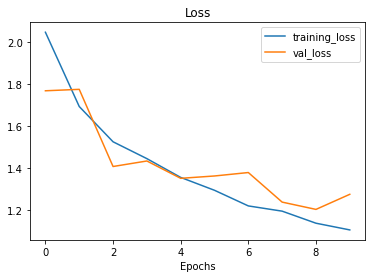

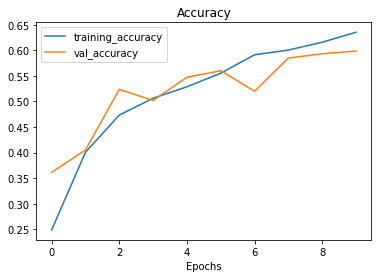

In [ ]:
# Check the model's performance with augumented data
fn.plot_loss_curves(history_4)

# Model 5 (Increase filters and epochs to 30)

In [ ]:
# Create the model
model_5 = Sequential([
  Conv2D(200, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(), 
  Conv2D(100, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(100, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(50, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model_5.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_5 = model_5.fit(train_data_augmented, # changed to augmented training data
                        epochs=30,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/30
235/235 [==============================] - 117s 497ms/step - loss: 2.1587 - accuracy: 0.1885 - val_loss: 1.9572 - val_accuracy: 0.2936
Epoch 2/30
235/235 [==============================] - 117s 496ms/step - loss: 1.9329 - accuracy: 0.3009 - val_loss: 1.8206 - val_accuracy: 0.3520
Epoch 3/30
235/235 [==============================] - 115s 489ms/step - loss: 1.7880 - accuracy: 0.3561 - val_loss: 1.7348 - val_accuracy: 0.3924
Epoch 4/30
235/235 [==============================] - 115s 489ms/step - loss: 1.5789 - accuracy: 0.4405 - val_loss: 1.4770 - val_accuracy: 0.4888
Epoch 5/30
235/235 [==============================] - 115s 488ms/step - loss: 1.4660 - accuracy: 0.4927 - val_loss: 1.3463 - val_accuracy: 0.5296
Epoch 6/30
235/235 [==============================] - 115s 489ms/step - loss: 1.3912 - accuracy: 0.5200 - val_loss: 1.5128 - val_accuracy: 0.5012
Epoch 7/30
235/235 [==============================] - 114s 486ms/step - loss: 1.3172 - accuracy: 0.5520 - val_loss: 1.3530 -

In [ ]:
model_5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 222, 222, 200)     5600      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 111, 111, 200)    0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 109, 109, 100)     180100    
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 54, 54, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 52, 52, 100)       90100     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 26, 26, 100)     

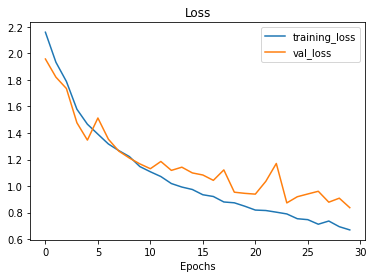

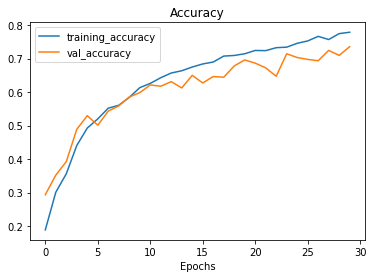

In [ ]:
# Check the model's performance with augumented data
fn.plot_loss_curves(history_5)

# **Model 6** (Testing parameters on descending filter size per layer)

In [ ]:
# Create the model
model_6 = Sequential([
  Conv2D(200, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(), 
  Conv2D(100, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(100, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(50, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model_6.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=50,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/50
235/235 [==============================] - 116s 489ms/step - loss: 2.1784 - accuracy: 0.1699 - val_loss: 2.0075 - val_accuracy: 0.2692
Epoch 2/50
235/235 [==============================] - 115s 488ms/step - loss: 1.9137 - accuracy: 0.3036 - val_loss: 1.7354 - val_accuracy: 0.3672
Epoch 3/50
235/235 [==============================] - 114s 487ms/step - loss: 1.6806 - accuracy: 0.4044 - val_loss: 1.6264 - val_accuracy: 0.4400
Epoch 4/50
235/235 [==============================] - 115s 489ms/step - loss: 1.5235 - accuracy: 0.4716 - val_loss: 1.6135 - val_accuracy: 0.4480
Epoch 5/50
235/235 [==============================] - 115s 489ms/step - loss: 1.4227 - accuracy: 0.5049 - val_loss: 1.3738 - val_accuracy: 0.5288
Epoch 6/50
235/235 [==============================] - 115s 489ms/step - loss: 1.3128 - accuracy: 0.5509 - val_loss: 1.3224 - val_accuracy: 0.5404
Epoch 7/50
235/235 [==============================] - 115s 490ms/step - loss: 1.2291 - accuracy: 0.5772 - val_loss: 1.2636 -

In [ ]:
model_6.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 222, 222, 200)     5600      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 111, 111, 200)    0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 109, 109, 100)     180100    
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 54, 54, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 52, 52, 100)       90100     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 26, 26, 100)     

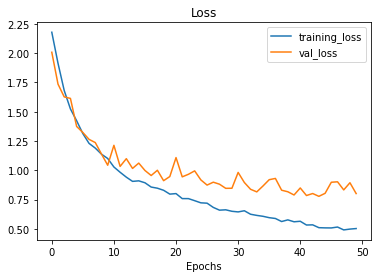

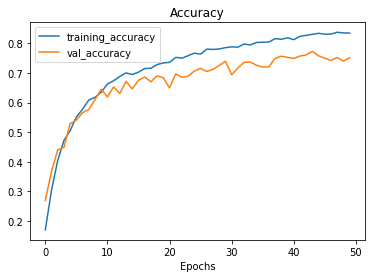

In [ ]:
# Check the model's performance with augumented data
fn.plot_loss_curves(history_6)

In [ ]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(
                 rotation_range=5,
                 width_shift_range=0.05,
                 height_shift_range=0.05,
                 shear_range=0.2,
                 zoom_range=0.2,
                 fill_mode='nearest',
                 horizontal_flip=True,
                 vertical_flip=False,
                 rescale=1/255)


train_data_augmented = train_datagen_augmented.flow_from_dataframe(dataframe=train_df,
                                                                   x_col='Filepath',
                                                                   y_col='Label',
                                                                   color_mode='rgb',
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1/255.)

test_data = test_datagen.flow_from_dataframe(dataframe=test_df,
                                              x_col='Filepath',
                                              y_col='Label',
                                              color_mode='rgb',
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 validated image filenames belonging to 10 classes.
Found 2500 validated image filenames belonging to 10 classes.


# Model 7 (Testing parameters with Ascending filter size, include Callbacks such as checkpoint, earlystopper, reduce Learning rate function)

In [ ]:
# Create the model
model_7 = Sequential([
  Conv2D(32, 5, strides = 2, padding ='Same', activation='relu', input_shape=(224, 224, 3), kernel_initializer='he_normal'),
  Conv2D(32, 5, strides = 2, padding = 'Same', activation ='relu',kernel_initializer='he_normal'),
  MaxPool2D(pool_size=(2,2)),
  Dropout(0.2), 
  Conv2D(64, 3, padding = 'Same', activation ='relu',kernel_initializer='he_normal'),
  Conv2D(64, 3, padding = 'Same', activation ='relu',kernel_initializer='he_normal'),
  MaxPool2D(pool_size=(2,2)),
  Dropout(0.2),
  Conv2D(128, 2, padding = 'Same', activation ='relu',kernel_initializer='he_normal'),
  Conv2D(128, 2, padding = 'Same', activation ='relu',kernel_initializer='he_normal'),
  MaxPool2D(pool_size=(2,2)),
  Dropout(0.2),
  Conv2D(256, 2, padding = 'Same', activation ='relu',kernel_initializer='he_normal'),
  Conv2D(256, 2, padding = 'Same', activation ='relu',kernel_initializer='he_normal'),
  GlobalAveragePooling2D(),
  Dense(512, activation = "relu",kernel_initializer='he_normal'),
  Dropout(0.2),
  Dense(10, activation = "softmax",kernel_initializer='he_normal',kernel_regularizer=l2()),
])

#callbacks
checkpointer = ModelCheckpoint(filepath='Multi_classification.hdf5', verbose=1, save_best_only=True, save_weights_only=True)
earlystopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=20, mode='auto')
reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, mode='auto')

# Compile the model
model_7.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


### **Callbacks** are extra functionality you can add to your models to be performed during or after training. Some of the most popular callbacks include:

* **Experiment tracking with TensorBoard** - log the performance of multiple models and then view and compare these models in a visual way on TensorBoard (a dashboard for inspecting neural network parameters). Helpful to compare the results of different models on your data.
* **Model checkpointing** - save your model as it trains so you can stop training if needed and come back to continue off where you left. Helpful if training takes a long time and can't be done in one sitting.
* **Early stopping** - leave your model training for an arbitrary amount of time and have it stop training automatically when it ceases to improve. Helpful when you've got a large dataset and don't know how long training will take.

In [ ]:
model_7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        36928     
                                                        

In [ ]:
# Fit the model
history_7 = model_7.fit(train_data_augmented, # changed to augmented training data
                        epochs=100,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[checkpointer, reduceLR, earlystopping])

Epoch 1/100
235/235 [==============================] - ETA: 0s - loss: 2.3961 - accuracy: 0.1025
Epoch 00001: val_loss improved from inf to 2.33791, saving model to Multi_classification.hdf5
235/235 [==============================] - 100s 390ms/step - loss: 2.3961 - accuracy: 0.1025 - val_loss: 2.3379 - val_accuracy: 0.1096 - lr: 0.0010
Epoch 2/100
235/235 [==============================] - ETA: 0s - loss: 2.3097 - accuracy: 0.1253
Epoch 00002: val_loss improved from 2.33791 to 2.29667, saving model to Multi_classification.hdf5
235/235 [==============================] - 90s 383ms/step - loss: 2.3097 - accuracy: 0.1253 - val_loss: 2.2967 - val_accuracy: 0.1184 - lr: 0.0010
Epoch 3/100
235/235 [==============================] - ETA: 0s - loss: 2.1824 - accuracy: 0.1773
Epoch 00003: val_loss improved from 2.29667 to 2.13017, saving model to Multi_classification.hdf5
235/235 [==============================] - 90s 383ms/step - loss: 2.1824 - accuracy: 0.1773 - val_loss: 2.1302 - val_accurac

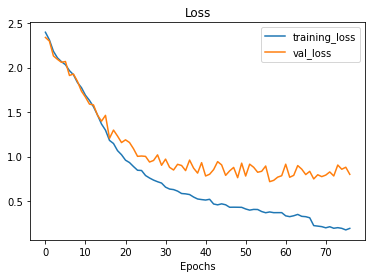

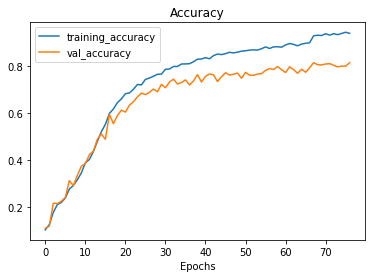

In [ ]:
fn.plot_loss_curves(history_7)

###**Making a prediction with our trained model**

In [ ]:
# What classes has our model been trained on?
class_names

array(['Hainanese Chicken Rice', 'bak kut teh', 'char kway teow',
       'chendol', 'curry puff', 'laksa', 'nasi lemak', 'oyster omelette',
       'roti prata', 'satay'], dtype='<U22')

In [ ]:
#Get in some our custom images
# -q is for "quiet"
!wget -q https://github.com/DSstore/AIP/raw/main/Char-Kway-Teow_1.jpg
!wget -q https://github.com/DSstore/AIP/raw/main/Nasi-Lemak-2.jpg
!wget -q https://github.com/DSstore/AIP/raw/main/Springleaf-Prata-Place.jpg
!wget -q https://github.com/DSstore/AIP/raw/main/laksa_soup.jpg
!wget -q https://github.com/DSstore/AIP/raw/main/satay.jpg


In [ ]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = fn.load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
  figure(figsize=(8, 6), dpi=80)


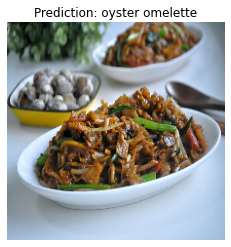

<Figure size 640x480 with 0 Axes>

In [ ]:
# Make a prediction using model_7
pred_and_plot(model_7, "Char-Kway-Teow_1.jpg", class_names)

In [ ]:
# Investigate what is happening
# turns out oyster omelette has the highest prediction score of 0.56 even though this is wrong
img = fn.load_and_prep_image("Char-Kway-Teow_1.jpg")
pred = model_7.predict((tf.expand_dims(img, axis=0)))
pred[0], class_names

(array([6.4994587e-05, 1.9309025e-04, 1.3316458e-01, 3.5901769e-05,
        3.6282901e-05, 9.4165057e-03, 1.5044963e-05, 8.4209412e-01,
        5.5136617e-05, 1.4924332e-02], dtype=float32),
 array(['Hainanese Chicken Rice', 'bak kut teh', 'char kway teow',
        'chendol', 'curry puff', 'laksa', 'nasi lemak', 'oyster omelette',
        'roti prata', 'satay'], dtype='<U22'))

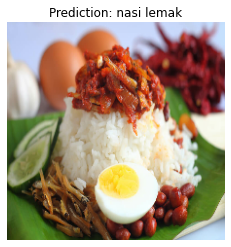

<Figure size 640x480 with 0 Axes>

In [ ]:
# Make a prediction using model_7
pred_and_plot(model_7, "Nasi-Lemak-2.jpg", class_names)

In [ ]:
img = fn.load_and_prep_image( "Nasi-Lemak-2.jpg")
pred = model_7.predict((tf.expand_dims(img, axis=0)))
pred[0], class_names

(array([3.9795840e-20, 1.3592949e-20, 1.7100732e-17, 1.0949553e-15,
        2.1423381e-23, 9.1695428e-18, 1.0000000e+00, 4.0532975e-18,
        1.0574315e-16, 1.6995128e-16], dtype=float32),
 array(['Hainanese Chicken Rice', 'bak kut teh', 'char kway teow',
        'chendol', 'curry puff', 'laksa', 'nasi lemak', 'oyster omelette',
        'roti prata', 'satay'], dtype='<U22'))

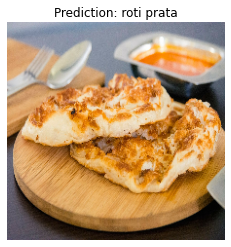

<Figure size 640x480 with 0 Axes>

In [ ]:
# Make a prediction using model_7
pred_and_plot(model_7, "Springleaf-Prata-Place.jpg", class_names)

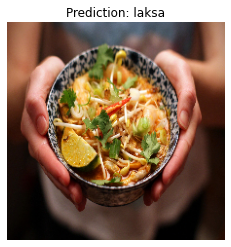

<Figure size 640x480 with 0 Axes>

In [ ]:
# Make a prediction using model_7
pred_and_plot(model_7, "laksa_soup.jpg", class_names)

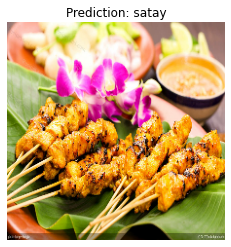

<Figure size 640x480 with 0 Axes>

In [ ]:
# Make a prediction using model_7
pred_and_plot(model_7, "satay.jpg", class_names)

In [ ]:
# Predict the label of the test_images
pred = model_7.predict(test_data)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_data_augmented.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

['oyster omelette',
 'bak kut teh',
 'char kway teow',
 'char kway teow',
 'curry puff',
 'nasi lemak',
 'satay',
 'roti prata',
 'Hainanese Chicken Rice',
 'chendol',
 'bak kut teh',
 'nasi lemak',
 'satay',
 'Hainanese Chicken Rice',
 'char kway teow',
 'laksa',
 'oyster omelette',
 'curry puff',
 'laksa',
 'roti prata',
 'laksa',
 'curry puff',
 'satay',
 'curry puff',
 'laksa',
 'oyster omelette',
 'curry puff',
 'chendol',
 'bak kut teh',
 'chendol',
 'satay',
 'nasi lemak',
 'Hainanese Chicken Rice',
 'nasi lemak',
 'satay',
 'char kway teow',
 'Hainanese Chicken Rice',
 'nasi lemak',
 'Hainanese Chicken Rice',
 'nasi lemak',
 'roti prata',
 'Hainanese Chicken Rice',
 'curry puff',
 'chendol',
 'oyster omelette',
 'chendol',
 'bak kut teh',
 'bak kut teh',
 'oyster omelette',
 'Hainanese Chicken Rice',
 'bak kut teh',
 'Hainanese Chicken Rice',
 'laksa',
 'Hainanese Chicken Rice',
 'chendol',
 'laksa',
 'satay',
 'nasi lemak',
 'bak kut teh',
 'curry puff',
 'oyster omelette',
 '

In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model_7.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [ ]:
img = output("SG_Food/test/chendol/chendol_test0.jpg")
img

'chendol'

In [ ]:
# Save a model
model_7.save("Multi_class_model")

INFO:tensorflow:Assets written to: Multi_class_model/assets


In [ ]:
# Save a model in h5
model_7.save("Multi_class_model.h5")

Hence, we are able to achieve 81% accuracy on multi-classification and hence completed what we want. 

Moving on to MvP 4.